# Chapter 5- Outlier Analysis
## Segment 3 - DBScan clustering to identify outliers

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

### DBScan clustering to identify outliers
#### Train your model and identify outliers

In [5]:
!pwd

/home/jason/dev/data_analysis_using_python


In [19]:
df = pd.read_csv('./csv/lynda.com/iris.data.csv',header=None,sep=',')

df.columns = ['sepal length','sepal width','petal length','petal width','species']
data = df.ix[:,0:4].values
target = df.ix[:,4].values
df[:5]

/home/jason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
model = DBSCAN(eps=0.8,min_samples=19).fit(data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=19, n_jobs=1, p=None)


#### Visualize your results

In [22]:
outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


Text(0.5,1,'DBSan for Outliers Detection')

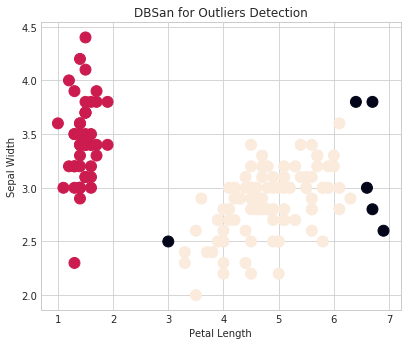

In [23]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

ax.scatter(data[:,2],data[:,1],c=colors,s=120)
ax.set_xlabel("Petal Length")
ax.set_ylabel("Sepal Width")
plt.title("DBSan for Outliers Detection")